In [23]:
#import lib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

train_df.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Loại bỏ các cột có sii trống

In [2]:
train_df = train_df.dropna(subset='sii')
#train_df
#2736 participants

## Age

In [24]:
## Phan tich age
# Phân loại độ tuổi
train_df['age_cate'] = train_df['Basic_Demos-Age'].apply(
    lambda x: 'child' if x < 13 else 
              'adolescent'
)

train_df['age_cate'] = train_df['age_cate'].astype('category')
train_df['age_cate']

0            child
1            child
2            child
3            child
4       adolescent
           ...    
3955    adolescent
3956         child
3957         child
3958    adolescent
3959         child
Name: age_cate, Length: 3960, dtype: category
Categories (2, object): ['adolescent', 'child']

<Axes: xlabel='age_cate', ylabel='count'>

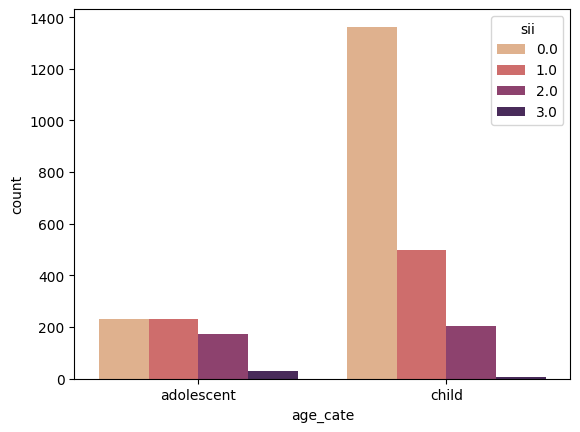

In [4]:
sns.countplot(data = train_df, x = 'age_cate', hue = 'sii', palette = 'flare')

In [5]:
train_df['BIA-BIA_BMC'].describe()

count    1813.000000
mean        6.954484
std        97.022087
min        -7.789610
25%         2.976800
50%         3.937490
75%         5.462500
max      4115.360000
Name: BIA-BIA_BMC, dtype: float64

## Sex

<Axes: xlabel='Basic_Demos-Sex', ylabel='count'>

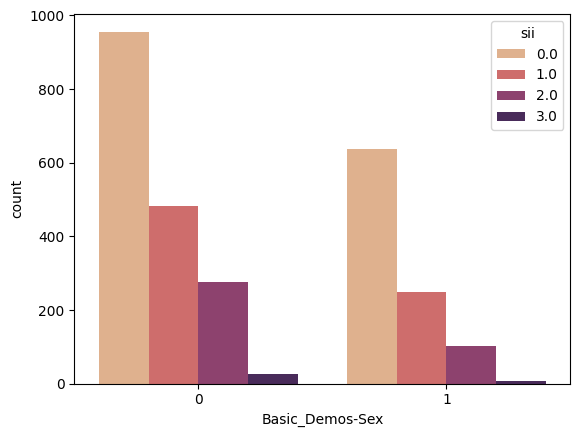

In [6]:
train_df['Basic_Demos-Sex'].isnull().sum()
train_df['Basic_Demos-Sex'] = train_df['Basic_Demos-Sex'].astype('category')

sns.countplot(data = train_df, x = 'Basic_Demos-Sex', hue = 'sii', palette = 'flare')

## Hours of internet use

<Axes: xlabel='PreInt_EduHx-computerinternet_hoursday', ylabel='count'>

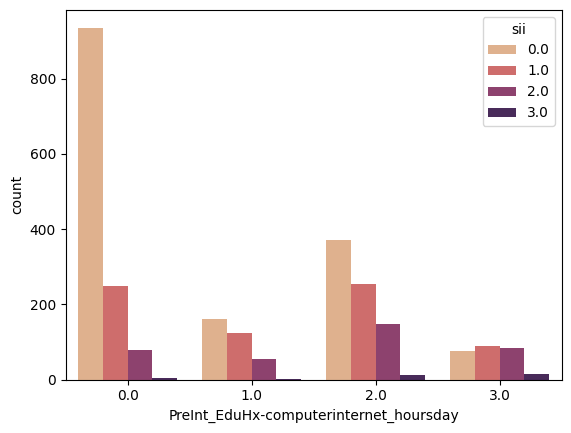

In [7]:
train_df['PreInt_EduHx-computerinternet_hoursday'].isnull().sum()
train_df['PreInt_EduHx-computerinternet_hoursday'] = train_df['PreInt_EduHx-computerinternet_hoursday'].astype('category')

sns.countplot(data=train_df, x='PreInt_EduHx-computerinternet_hoursday', hue='sii', palette='flare')

In [15]:
#PCIAT_18
p18 = train_df[['age_cate', 'PreInt_EduHx-computerinternet_hoursday', 'CGAS-CGAS_Score', 'PCIAT-PCIAT_18', 'PCIAT-PCIAT_Total']]

p18 = p18.dropna(subset='CGAS-CGAS_Score')
p18['PreInt_EduHx-computerinternet_hoursday'] = p18['PreInt_EduHx-computerinternet_hoursday'].fillna(0).astype('int64')
p18['hoursday_mentalscore'] = p18['PreInt_EduHx-computerinternet_hoursday'] * p18['CGAS-CGAS_Score']


corr= p18[['hoursday_mentalscore', 'PCIAT-PCIAT_18', 'PCIAT-PCIAT_Total']].corr().loc['hoursday_mentalscore', ['PCIAT-PCIAT_18', 'PCIAT-PCIAT_Total']]
print(corr)
#p18['hours_metal_score'] = 

PCIAT-PCIAT_18       0.221971
PCIAT-PCIAT_Total    0.362436
Name: hoursday_mentalscore, dtype: float64


In [35]:
# Lọc dữ liệu cho từng nhóm
child_df = train_df[train_df['age_cate'] == 'child']
aldose_df = train_df[train_df['age_cate'] == 'adolescent']

train_df['CGAS-CGAS_Score'].dtypes

dtype('float64')

In [37]:
aldose_df['CGAS-CGAS_Score'].describe()

count    574.000000
mean      64.108014
std       12.316741
min       30.000000
25%       55.000000
50%       65.000000
75%       72.000000
max       95.000000
Name: CGAS-CGAS_Score, dtype: float64

In [38]:
child_df['CGAS-CGAS_Score'].describe()

count    1847.000000
mean       65.873308
std        24.628049
min        25.000000
25%        60.000000
50%        65.000000
75%        75.000000
max       999.000000
Name: CGAS-CGAS_Score, dtype: float64

## Đánh giá CGAS-CGAS_Score với Child


In [39]:
child_df['CGAS-CGAS_Score'].isnull().sum()
child_df['CGAS-CGAS_Score'].describe()

count    1847.000000
mean       65.873308
std        24.628049
min        25.000000
25%        60.000000
50%        65.000000
75%        75.000000
max       999.000000
Name: CGAS-CGAS_Score, dtype: float64

<Axes: xlabel='PreInt_EduHx-computerinternet_hoursday', ylabel='CGAS-CGAS_Score'>

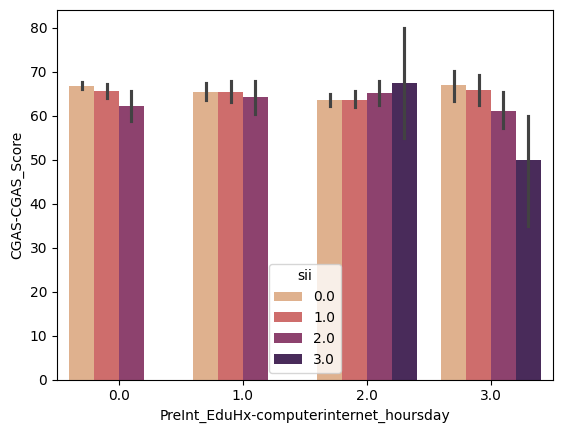

In [40]:
sns.barplot(data = child_df, x = 'PreInt_EduHx-computerinternet_hoursday', y = 'CGAS-CGAS_Score', hue = 'sii', palette = 'flare')

In [41]:
child_df[child_df['sii'] == 3]

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii,age_cate
405,1824417f,Summer,11,0,Spring,60.0,Winter,15.166845,61.5,81.6,...,4.0,4.0,80.0,Spring,60.0,82.0,Summer,3.0,3.0,child
868,343460ab,Winter,12,0,Spring,55.0,Spring,30.630714,70.0,213.5,...,4.0,5.0,87.0,Spring,56.0,77.0,Winter,3.0,3.0,child
2036,8148c785,Summer,12,0,Spring,80.0,Fall,29.118343,65.0,175.0,...,3.0,2.0,83.0,Fall,61.0,84.0,Summer,2.0,3.0,child
2541,a08ebf6e,Winter,11,0,Spring,55.0,Spring,18.234286,56.5,82.8,...,5.0,5.0,88.0,Spring,47.0,66.0,Winter,2.0,3.0,child
2860,b7c3834f,Spring,12,1,Winter,35.0,Summer,28.301371,61.0,149.8,...,1.0,4.0,84.0,Summer,49.0,68.0,Spring,3.0,3.0,child
3030,c308b134,Fall,12,0,NaN,NaN,Winter,23.025951,63.0,130.0,...,5.0,4.0,81.0,Winter,44.0,62.0,Fall,0.0,3.0,child


<Axes: xlabel='PreInt_EduHx-computerinternet_hoursday', ylabel='CGAS-CGAS_Score'>

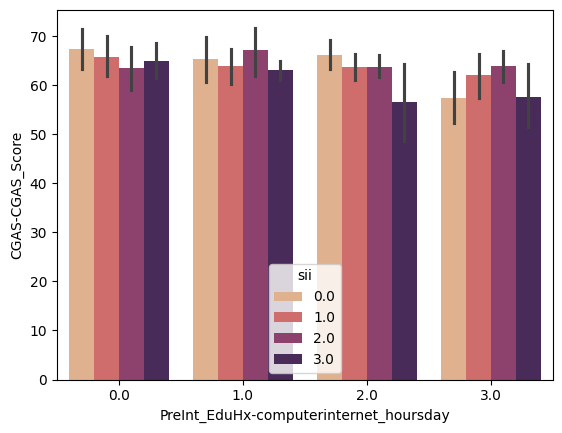

In [42]:
sns.barplot(data = aldose_df, x = 'PreInt_EduHx-computerinternet_hoursday', y = 'CGAS-CGAS_Score', hue = 'sii', palette = 'flare')

In [ ]:
aldose_df[aldose_df['sii'] == 3]

<Axes: xlabel='PreInt_EduHx-computerinternet_hoursday', ylabel='CGAS-CGAS_Score'>

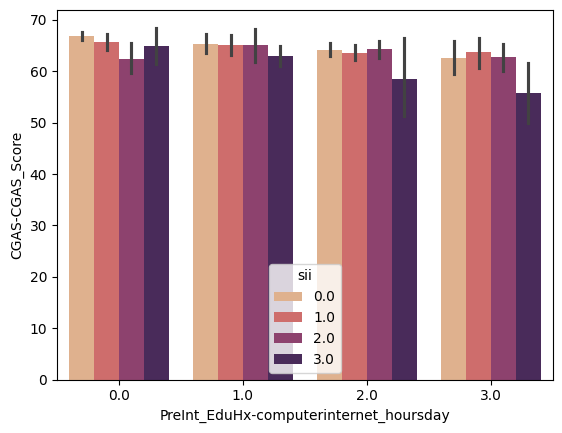

In [44]:
sns.barplot(data = train_df, x = 'PreInt_EduHx-computerinternet_hoursday', y = 'CGAS-CGAS_Score', hue = 'sii', palette = 'flare')

## Phân tích Internet_Hours-Age



In [ ]:
train_df['Internet_Hours_Age'] = train_df['PreInt_EduHx-computerinternet_hoursday'] * train_df['Basic_Demos-Age']

corr= train_df[['Internet_Hours_Age', 'PCIAT-PCIAT_Total', 'sii']].corr().loc['Internet_Hours_Age', ['PCIAT-PCIAT_Total', 'sii']]
print(corr)